# New York house price predictor

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("C:/Users/Dwarkadhish Kamthane/Desktop/Machiene Learning/NY-house price predictor  by neural network/NY-House-Dataset.csv/NY-House-Dataset.csv")
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [72]:
df.shape

(4801, 17)

In [73]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [75]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [76]:
df.duplicated().sum()

214

**dropping duplicates**


In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.duplicated().sum()

0

In [79]:
df = df.drop('BROKERTITLE', axis=1)
df = df.drop('MAIN_ADDRESS', axis=1)
df = df.drop('FORMATTED_ADDRESS', axis=1)
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",United States,New York,New York County,New York,West 57th Street,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065",United States,New York,New York County,New York,East 64th Street,40.767224,-73.969856


**Pie chart for House types**

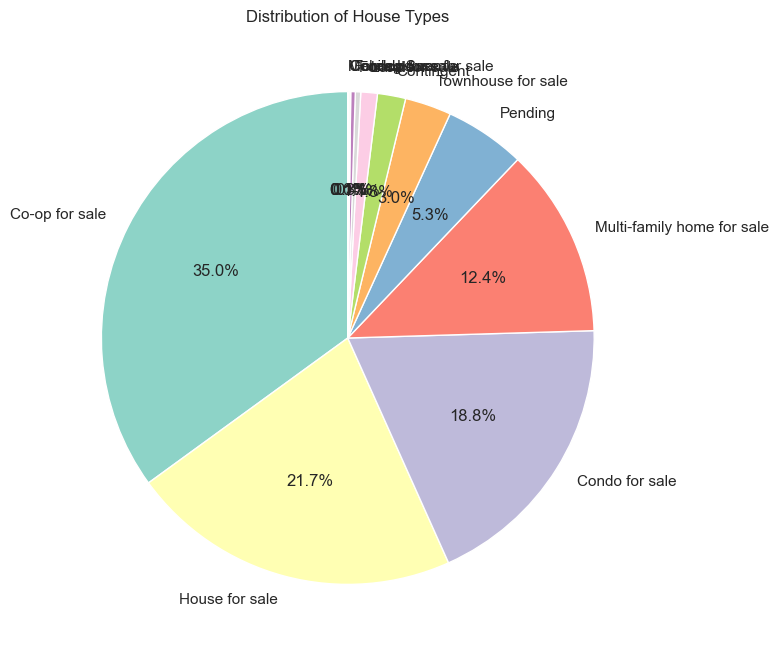

In [152]:
import matplotlib.pyplot as plt


counter = df['TYPE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counter, labels=counter.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(counter)))

plt.title('Distribution of House Types')

plt.show()


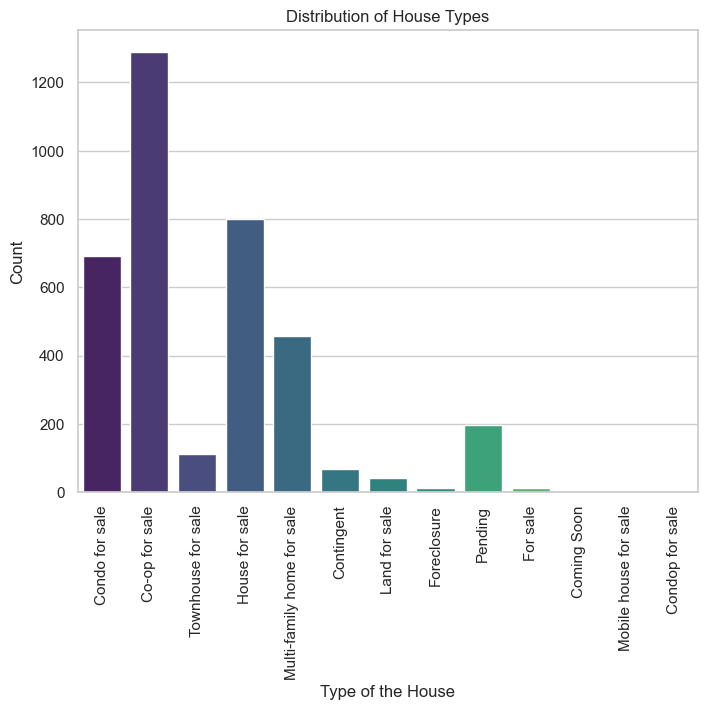

In [153]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TYPE', palette='viridis')


plt.xticks(rotation=90)


plt.xlabel('Type of the House')
plt.ylabel('Count')
plt.title('Distribution of House Types')

plt.show()


**Bar graph for count of houses on different strret names**

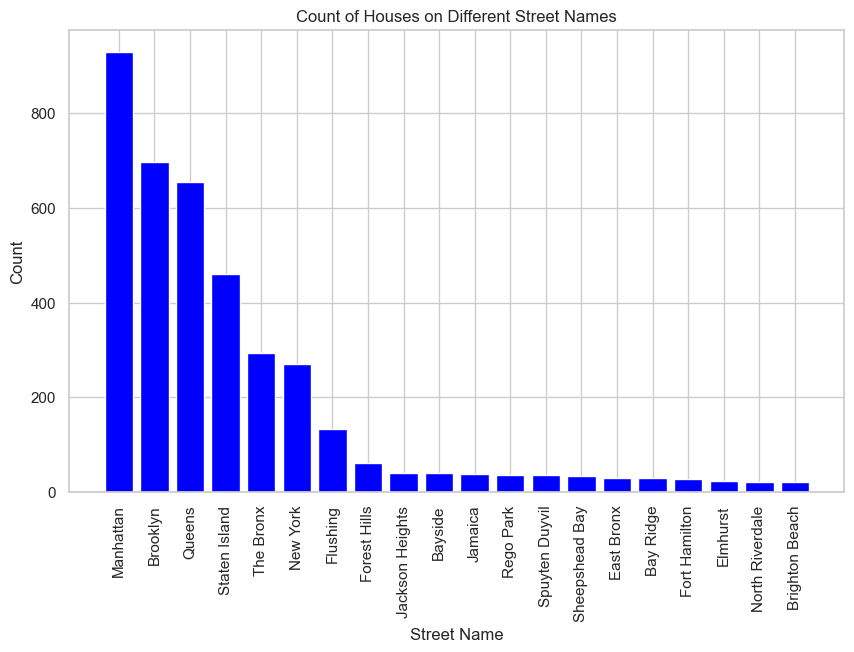

In [82]:
counter = df['STREET_NAME'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(counter.index[:20], counter[:20], color='blue')
plt.xticks(rotation=90)

plt.xlabel('Street Name')
plt.ylabel('Count')
plt.title('Count of Houses on Different Street Names')

plt.show()

In [83]:
counter = df['STREET_NAME'].value_counts()
counter

STREET_NAME
Manhattan           930
Brooklyn            696
Queens              655
Staten Island       461
The Bronx           294
                   ... 
Rector Place          1
Centre Street         1
East 96th Street      1
35th Avenue           1
Mount Eden            1
Name: count, Length: 174, dtype: int64

**A high positive skewness means the distribution is stretched to the right (e.g., house prices might have a few extremely expensive houses).
A high negative skewness means the distribution is stretched to the left (e.g., most houses are very cheap, with few expensive ones).**

In [84]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: 65.35481192348358
Skewness for BEDS: 5.495813321650833
Skewness for BATH: 7.82905243382857
Skewness for PROPERTYSQFT: 12.348808100744424
Skewness for LATITUDE: -0.08752198915216305
Skewness for LONGITUDE: -0.3920869876425833


**Observing the frequency on basis of number of beds in houses**

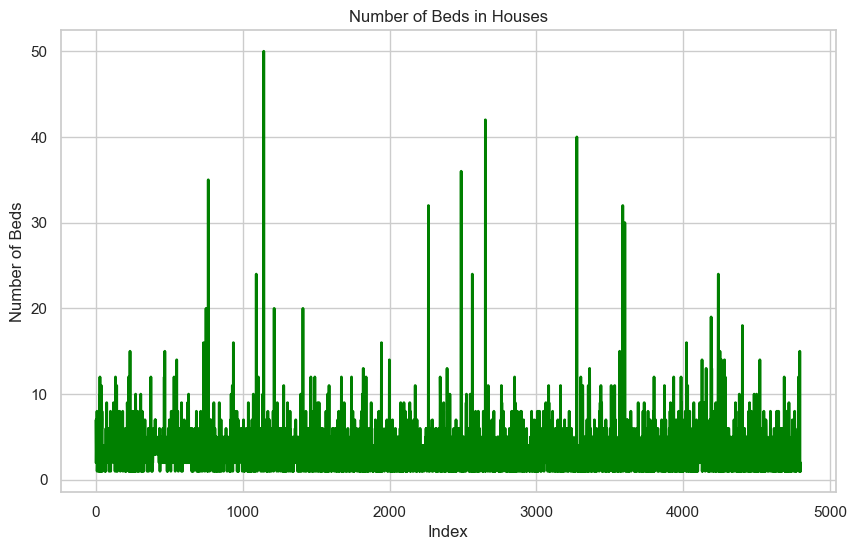

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(df['BEDS'], color='green', linewidth=2)

plt.xlabel('Index')
plt.ylabel('Number of Beds')
plt.title('Number of Beds in Houses')

plt.show()


**The values above 10 are outliers**

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


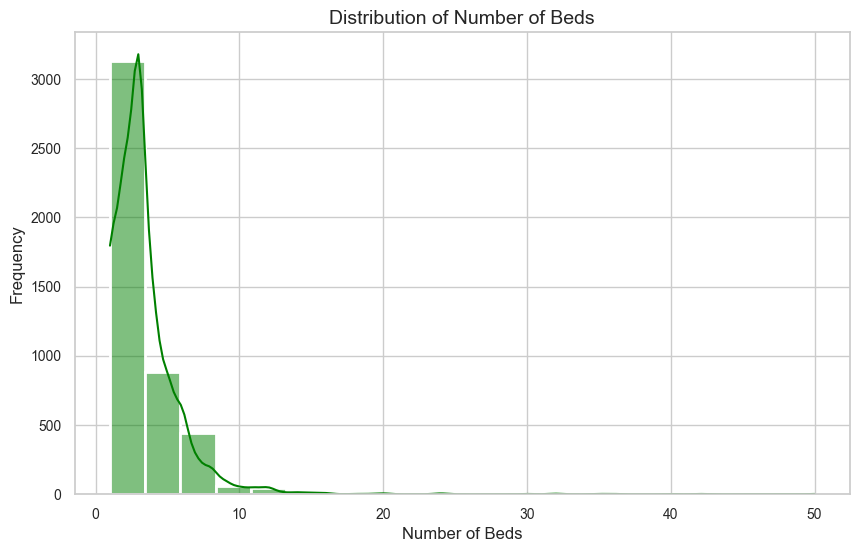

In [86]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['BEDS'], bins=20, color='green', edgecolor='white', kde=True, linewidth=2)

plt.xlabel('Number of Beds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Number of Beds', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)

plt.show()


**Observing the required data based on num of baths**

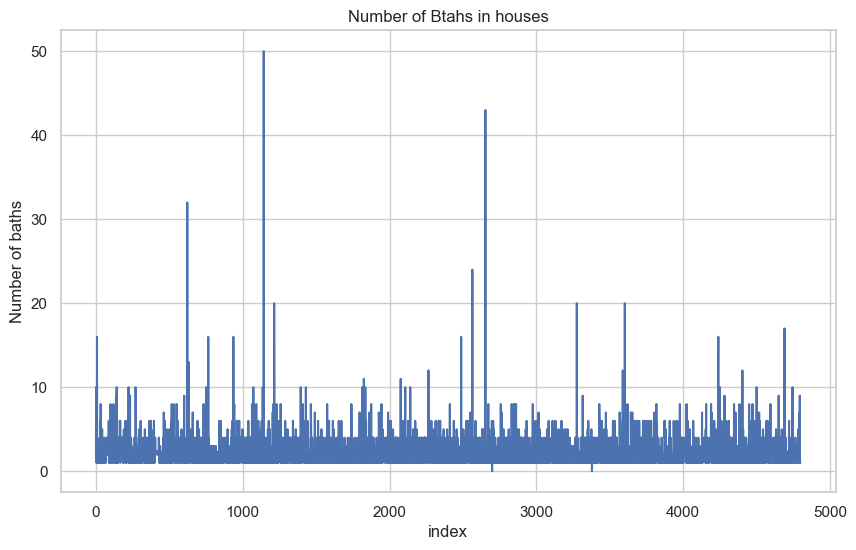

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(df['BATH'])

plt.xlabel('index')
plt.ylabel('Number of baths')
plt.title('Number of Btahs in houses')

plt.show()

**Removing the outliers**

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


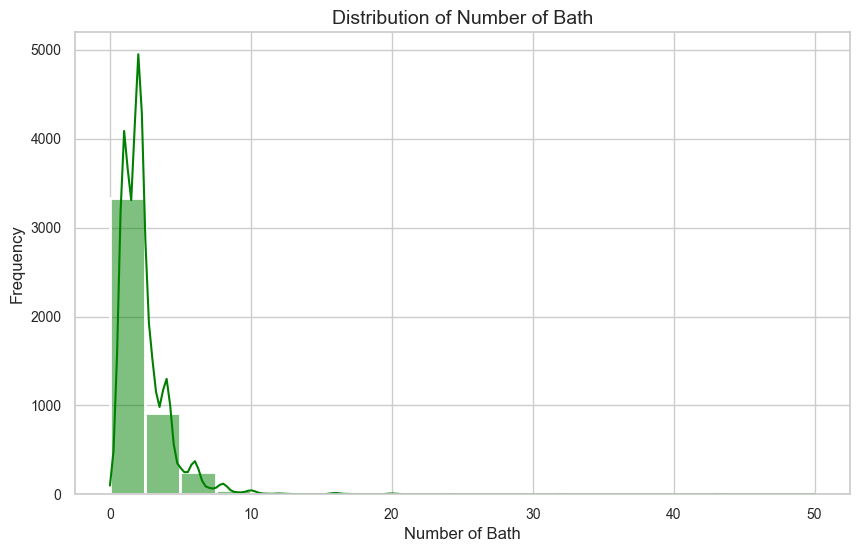

In [88]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['BATH'], bins=20, color='green', edgecolor='white', kde=True, linewidth=2)

plt.xlabel('Number of Bath', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Number of Bath', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)

plt.show()


**Obersving the data based on the square foot of houses**

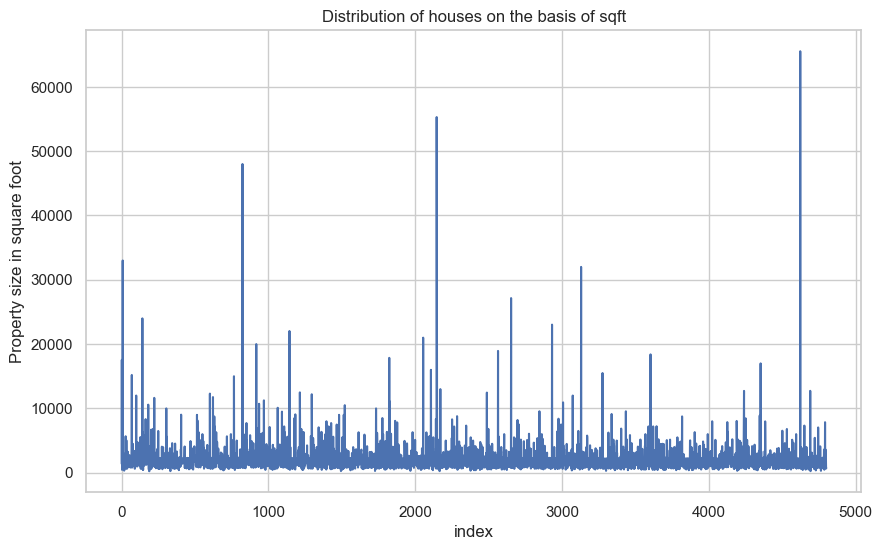

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(df['PROPERTYSQFT'])

plt.xlabel('index')
plt.ylabel('Property size in square foot')
plt.title('Distribution of houses on the basis of sqft')

plt.show()

**Plotting after removing the outliers**

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


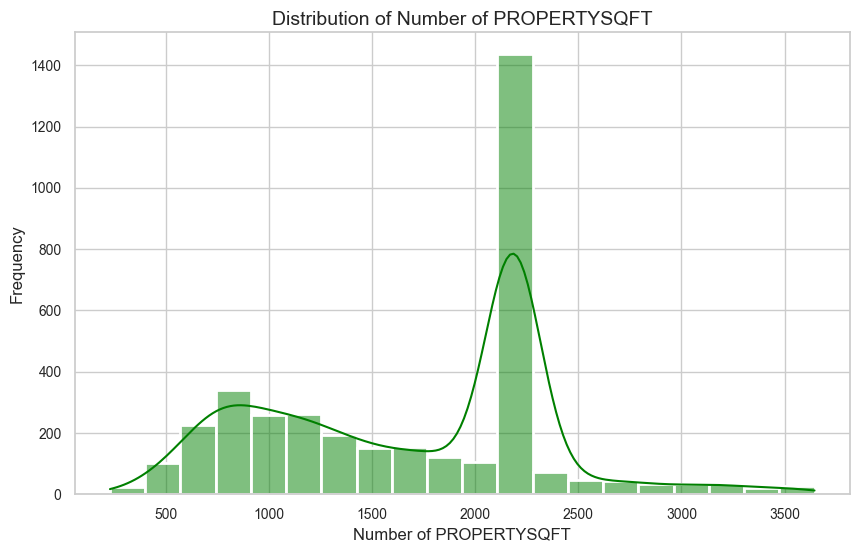

In [154]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['PROPERTYSQFT'], bins=20, color='green', edgecolor='white', kde=True, linewidth=2)

plt.xlabel('Number of PROPERTYSQFT', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Number of PROPERTYSQFT', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)

plt.show()


In [91]:
df.head(1)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483


**Observing the data based on the size of houses**

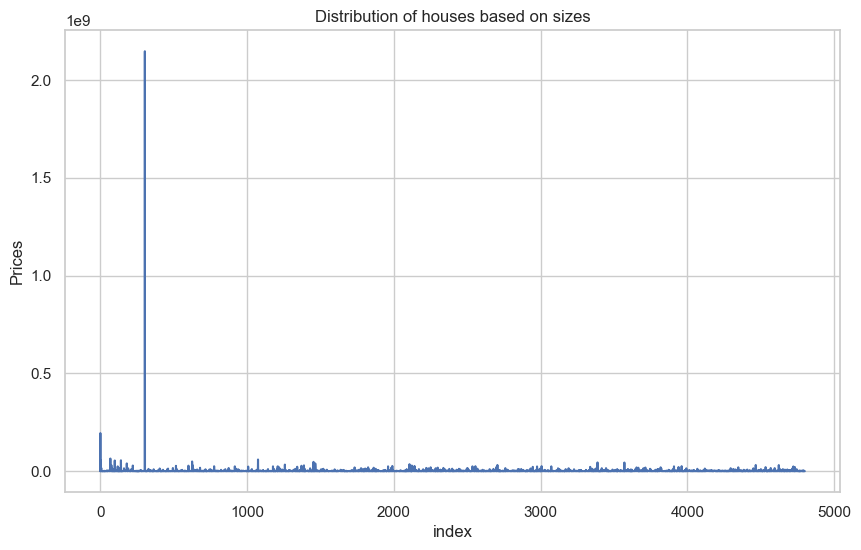

In [92]:

plt.figure(figsize=(10,6))
plt.plot(df['PRICE'])
plt.xlabel('index')
plt.ylabel('Prices')
plt.title('Distribution of houses based on sizes')
plt.show()

**Plotting after removing the outliers**

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


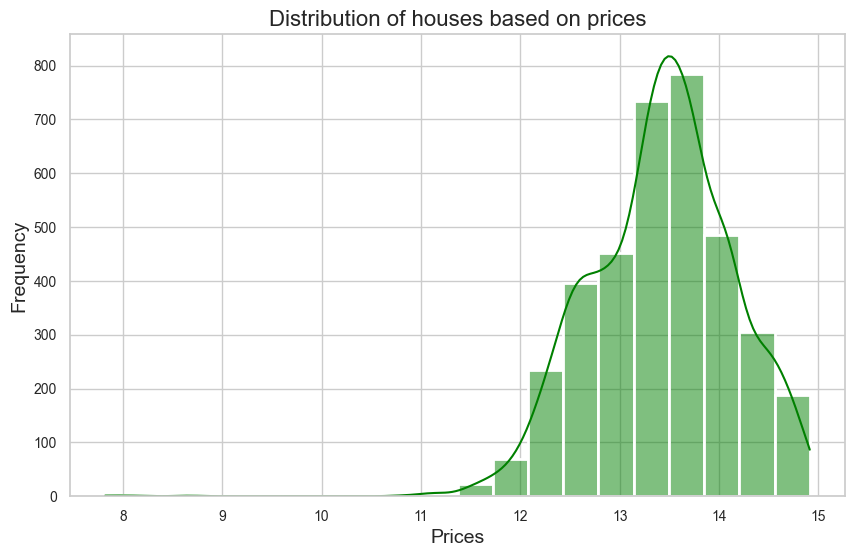

In [156]:


sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df['PRICE'],bins=20 , color='green' , edgecolor='white', kde=True , linewidth=2)
plt.xlabel('Prices' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.title('Distribution of houses based on prices' , fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()





**Observing the data based on the latitude houses are situated**

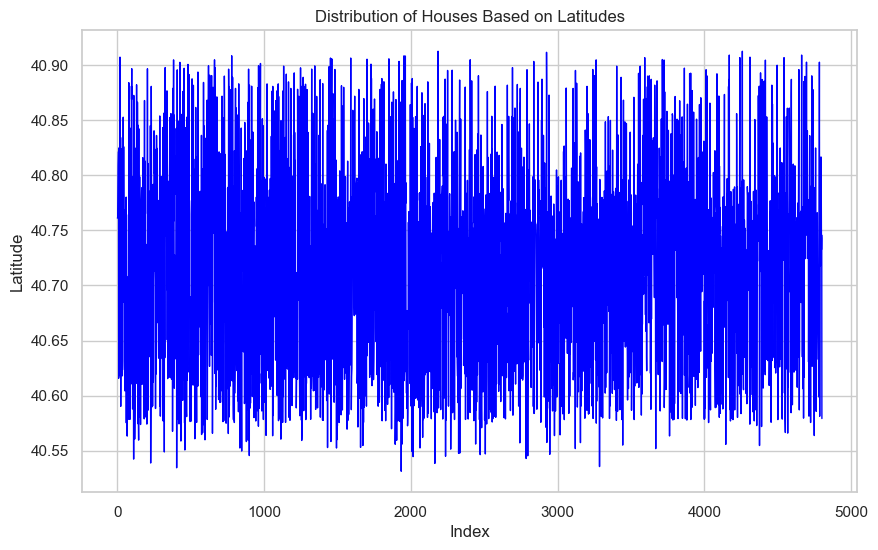

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(df['LATITUDE'], color='blue', linewidth=1)

plt.xlabel('Index')
plt.ylabel('Latitude')
plt.title('Distribution of Houses Based on Latitudes')
plt.show()

**PLotting graph of the useful data only**

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


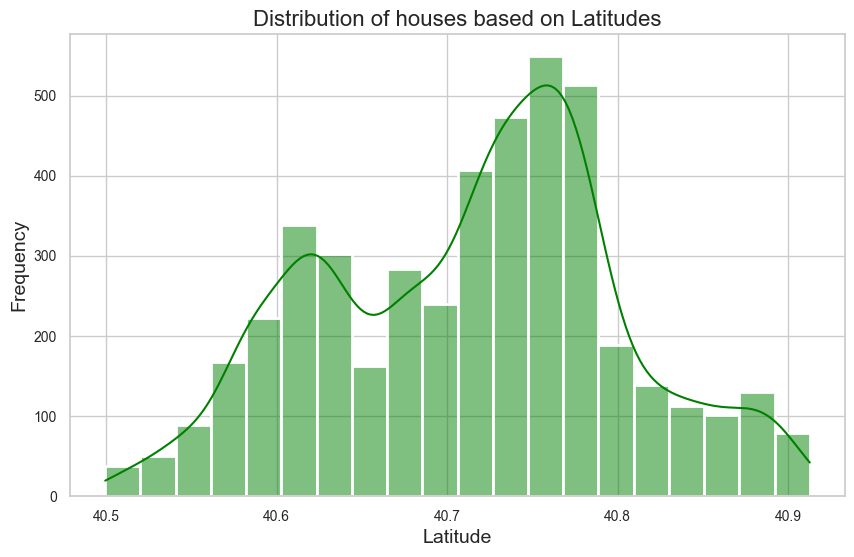

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df['LATITUDE'],bins=20 , color='green' , edgecolor='white', kde=True , linewidth=2)
plt.xlabel('Latitude' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.title('Distribution of houses based on Latitudes' , fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

**Observing the data on basis of Longitude where houses are situated**

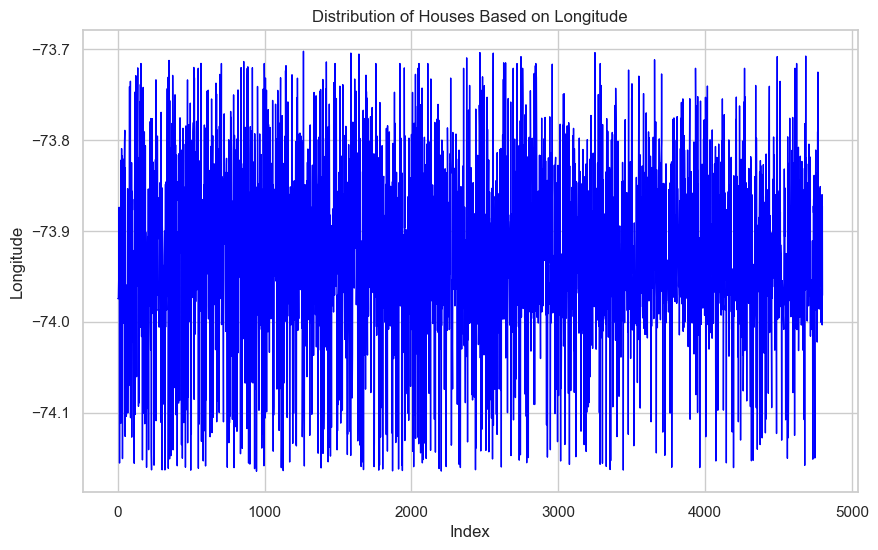

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(df['LONGITUDE'], color='blue', linewidth=1)

plt.xlabel('Index')
plt.ylabel('Longitude')
plt.title('Distribution of Houses Based on Longitude')
plt.show()

**Plotting the graph after analysing the useful data from the above observation**

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


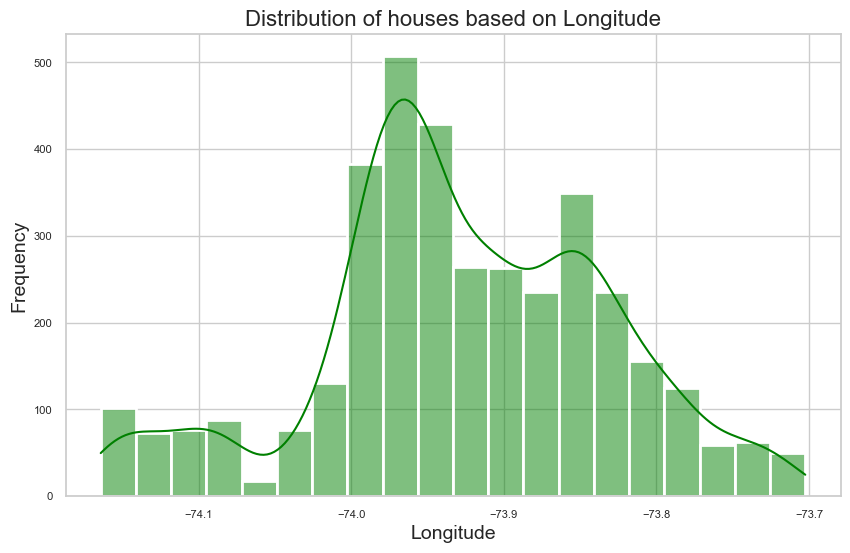

In [160]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df['LONGITUDE'],bins=20 , color='green' , edgecolor='white', kde=True , linewidth=2)
plt.xlabel('Longitude' , fontsize=14)
plt.ylabel('Frequency' , fontsize=14)
plt.title('Distribution of houses based on Longitude' , fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.show()

In [98]:
filter_df=df.iloc[:,[1,2,3,4,12,13]]
filter_df

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.000000,40.761255,-73.974483
1,195000000,7,10.000000,17545.000000,40.766393,-73.980991
2,260000,4,2.000000,2015.000000,40.541805,-74.196109
3,69000,3,1.000000,445.000000,40.761398,-73.974613
4,55000000,7,2.373861,14175.000000,40.767224,-73.969856
...,...,...,...,...,...,...
4796,599000,1,1.000000,2184.207862,40.774350,-73.955879
4797,245000,1,1.000000,2184.207862,40.732538,-73.860152
4798,1275000,1,1.000000,2184.207862,40.745882,-74.003398
4799,598125,2,1.000000,655.000000,40.742770,-73.872752


**Applying the InterQuartile range**

In [99]:
for column in filter_df.columns:
    Q1 = filter_df[column].quantile(0.25)
    Q3 = filter_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = filter_df[(filter_df[column] >= lower_bound) & (filter_df[column] <= upper_bound)][column]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TYPE                         4587 non-null   object 
 1   PRICE                        4059 non-null   float64
 2   BEDS                         4369 non-null   float64
 3   BATH                         4479 non-null   float64
 4   PROPERTYSQFT                 4213 non-null   float64
 5   ADDRESS                      4587 non-null   object 
 6   STATE                        4587 non-null   object 
 7   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 8   LOCALITY                     4587 non-null   object 
 9   SUBLOCALITY                  4587 non-null   object 
 10  STREET_NAME                  4587 non-null   object 
 11  LONG_NAME                    4587 non-null   object 
 12  LATITUDE                     4587 non-null   float64
 13  LONGITUDE              

**Checking the null elements after inteerquartile range**


In [101]:
df.isnull().sum()

TYPE                             0
PRICE                          528
BEDS                           218
BATH                           108
PROPERTYSQFT                   374
ADDRESS                          0
STATE                            0
ADMINISTRATIVE_AREA_LEVEL_2      0
LOCALITY                         0
SUBLOCALITY                      0
STREET_NAME                      0
LONG_NAME                        0
LATITUDE                         0
LONGITUDE                      145
dtype: int64

**Dropping the null elements**

In [102]:
df.dropna(inplace=True)

In [103]:
df.isnull().sum()

TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

**Checking Skewness for each column**

In [104]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: 1.3595705100222184
Skewness for BEDS: 0.8089954398444785
Skewness for BATH: 1.2791958127811374
Skewness for PROPERTYSQFT: -0.05623864972278096
Skewness for LATITUDE: 0.07395094609024593
Skewness for LONGITUDE: -0.20738809206718986


**The values of skewness are now smaller but skewness for PRICE is still too high**

In [105]:
df['PRICE'] = np.log(df['PRICE']+1)

In [106]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: -0.5070781114719
Skewness for BEDS: 0.8089954398444785
Skewness for BATH: 1.2791958127811374
Skewness for PROPERTYSQFT: -0.05623864972278096
Skewness for LATITUDE: 0.07395094609024593
Skewness for LONGITUDE: -0.20738809206718986


In [107]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,13.421410,2.771592,1.893789,1693.288971,40.716504,-73.927382
std,0.709889,1.433381,0.951323,681.921263,0.085671,0.095550
min,7.822044,1.000000,0.000000,230.000000,40.531257,-74.164342
25%,12.945629,2.000000,1.000000,1060.750000,40.639421,-73.980679
50%,13.457407,3.000000,2.000000,1950.000000,40.726843,-73.936958
75%,13.905122,3.000000,2.000000,2184.207862,40.771828,-73.856960
max,14.912455,7.000000,6.000000,3645.000000,40.912729,-73.702450


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3682 entries, 0 to 4800
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TYPE                         3682 non-null   object 
 1   PRICE                        3682 non-null   float64
 2   BEDS                         3682 non-null   float64
 3   BATH                         3682 non-null   float64
 4   PROPERTYSQFT                 3682 non-null   float64
 5   ADDRESS                      3682 non-null   object 
 6   STATE                        3682 non-null   object 
 7   ADMINISTRATIVE_AREA_LEVEL_2  3682 non-null   object 
 8   LOCALITY                     3682 non-null   object 
 9   SUBLOCALITY                  3682 non-null   object 
 10  STREET_NAME                  3682 non-null   object 
 11  LONG_NAME                    3682 non-null   object 
 12  LATITUDE                     3682 non-null   float64
 13  LONGITUDE              

**Dropping useless columns**

In [109]:
df.drop(columns=['ADDRESS','LONG_NAME'],inplace=True)
df.head(1)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE
0,Condo for sale,12.660331,2.0,2.0,1400.0,"New York, NY 10022",New York County,New York,Manhattan,East 55th Street,40.761255,-73.974483


In [110]:
string_columns = df.select_dtypes(include="object").columns
print("String columns are = ", string_columns)
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical columns are = ", numerical_columns)

String columns are =  Index(['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY', 'STREET_NAME'],
      dtype='object')
Numerical columns are =  Index(['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'], dtype='object')


**Observing correlation**

In [111]:
df[numerical_columns].corr()


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.427121,0.569273,0.359384,-0.084685,-0.147457
BEDS,0.427121,1.000000,0.678056,0.451444,-0.130115,0.074489
BATH,0.569273,0.678056,1.000000,0.438539,-0.125187,0.034903
PROPERTYSQFT,0.359384,0.451444,0.438539,1.000000,0.005695,0.106744
LATITUDE,-0.084685,-0.130115,-0.125187,0.005695,1.000000,0.446606
LONGITUDE,-0.147457,0.074489,0.034903,0.106744,0.446606,1.000000


**Plotting Pearsons correlation matrix**

<Axes: title={'center': 'Pearson Correlation Matrix'}>

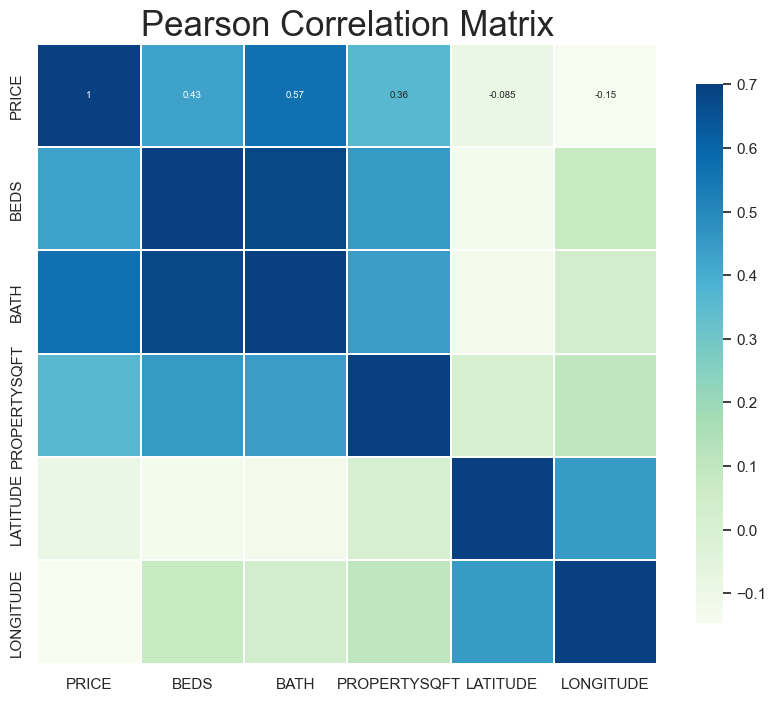

In [112]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df[numerical_columns].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [113]:
df['TYPE'].value_counts()



TYPE
Co-op for sale                1289
House for sale                 799
Condo for sale                 691
Multi-family home for sale     457
Pending                        195
Townhouse for sale             112
Contingent                      68
Land for sale                   40
For sale                        13
Foreclosure                     11
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

**Converting Categorical Values**

In [114]:
print(pd.get_dummies(df['TYPE']))


      Co-op for sale  Coming Soon  Condo for sale  Condop for sale  \
0              False        False            True            False   
3              False        False            True            False   
6              False        False            True            False   
8               True        False           False            False   
9               True        False           False            False   
...              ...          ...             ...              ...   
4796            True        False           False            False   
4797            True        False           False            False   
4798            True        False           False            False   
4799           False        False            True            False   
4800            True        False           False            False   

      Contingent  For sale  Foreclosure  House for sale  Land for sale  \
0          False     False        False           False          False   
3          

In [115]:
df['STATE'].value_counts()


STATE
Brooklyn, NY 11235            94
Forest Hills, NY 11375        87
Brooklyn, NY 11209            82
Brooklyn, NY 11234            79
Staten Island, NY 10314       72
                              ..
Queens, NY 11105               1
Long Island City, NY 11103     1
Nyc, NY 10465                  1
Bronx Ny, NY 10458             1
Ozone Park, NY 11416           1
Name: count, Length: 298, dtype: int64

**Coonverting Categorical Values**

In [116]:
print(pd.get_dummies(df['STATE']))


      Arverne, NY 11692  Astoria, NY 11101  Astoria, NY 11102  \
0                 False              False              False   
3                 False              False              False   
6                 False              False              False   
8                 False              False              False   
9                 False              False              False   
...                 ...                ...                ...   
4796              False              False              False   
4797              False              False              False   
4798              False              False              False   
4799              False              False              False   
4800              False              False              False   

      Astoria, NY 11103  Astoria, NY 11105  Astoria, NY 11106  \
0                 False              False              False   
3                 False              False              False   
6                 False 

In [117]:
df['ADMINISTRATIVE_AREA_LEVEL_2'].value_counts()


ADMINISTRATIVE_AREA_LEVEL_2
New York           1921
United States      1702
New York County      12
11214                 7
Queens County         6
Kings County          5
Bronx County          4
11229                 3
10310                 2
10003                 2
10017                 2
10306                 2
10471                 2
11237                 1
10466                 1
Brooklyn              1
10465                 1
11412                 1
10301                 1
10303                 1
10463                 1
11417                 1
11414                 1
11234                 1
10002                 1
Name: count, dtype: int64

In [118]:
print(pd.get_dummies(df['ADMINISTRATIVE_AREA_LEVEL_2']))


      10002  10003  10017  10301  10303  10306  10310  10463  10465  10466  \
0     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
6     False  False  False  False  False  False  False  False  False  False   
8     False  False  False  False  False  False  False  False  False  False   
9     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4796  False  False  False  False  False  False  False  False  False  False   
4797  False  False  False  False  False  False  False  False  False  False   
4798  False  False  False  False  False  False  False  False  False  False   
4799  False  False  False  False  False  False  False  False  False  False   
4800  False  False  False  False  False  False  False  False  False  False   

      ...  11412  11414  11417  Bronx County  Brooklyn  Kings C

In [119]:
df['LOCALITY'].value_counts()


LOCALITY
New York           1714
New York County     737
Queens County       535
Kings County        425
Bronx County        171
Richmond County      53
United States        31
Queens                6
Brooklyn              5
The Bronx             4
Flatbush              1
Name: count, dtype: int64

In [120]:
print(pd.get_dummies(df['LOCALITY']))


      Bronx County  Brooklyn  Flatbush  Kings County  New York  \
0            False     False     False         False      True   
3            False     False     False         False      True   
6            False     False     False         False     False   
8            False     False     False         False     False   
9            False     False     False          True     False   
...            ...       ...       ...           ...       ...   
4796         False     False     False         False     False   
4797         False     False     False         False      True   
4798         False     False     False         False      True   
4799         False     False     False         False     False   
4800         False     False     False          True     False   

      New York County  Queens  Queens County  Richmond County  The Bronx  \
0               False   False          False            False      False   
3               False   False          False           

In [121]:
df['SUBLOCALITY'].value_counts()


SUBLOCALITY
New York            768
Queens County       590
Queens              533
Kings County        522
Brooklyn            425
Richmond County     298
Bronx County        235
The Bronx           173
New York County      57
Staten Island        53
Manhattan            12
Flushing              4
Coney Island          3
Riverdale             3
East Bronx            1
Brooklyn Heights      1
Jackson Heights       1
Rego Park             1
Fort Hamilton         1
Snyder Avenue         1
Name: count, dtype: int64

In [122]:
print(pd.get_dummies(df['SUBLOCALITY']))


      Bronx County  Brooklyn  Brooklyn Heights  Coney Island  East Bronx  \
0            False     False             False         False       False   
3            False     False             False         False       False   
6            False     False             False         False       False   
8            False     False             False         False        True   
9            False      True             False         False       False   
...            ...       ...               ...           ...         ...   
4796         False     False             False         False       False   
4797         False     False             False         False       False   
4798         False     False             False         False       False   
4799         False     False             False         False       False   
4800         False      True             False         False       False   

      Flushing  Fort Hamilton  Jackson Heights  Kings County  Manhattan  \
0        Fal

In [123]:
df['STREET_NAME'].value_counts()


STREET_NAME
Manhattan        737
Queens           590
Brooklyn         522
Staten Island    298
The Bronx        238
                ... 
98th Place         1
Bay Terrace        1
Arverne            1
Vinegar Hill       1
Mount Eden         1
Name: count, Length: 163, dtype: int64

In [124]:
print(pd.get_dummies(df['STREET_NAME']))


      139th Street   2501  35th Avenue     3G  5th Avenue  61st Street  \
0            False  False        False  False       False        False   
3            False  False        False  False       False        False   
6            False  False        False  False       False        False   
8            False  False        False  False       False        False   
9            False  False        False  False       False        False   
...            ...    ...          ...    ...         ...          ...   
4796         False  False        False  False       False        False   
4797         False  False        False  False       False        False   
4798         False  False        False  False       False        False   
4799         False  False        False  False       False        False   
4800         False  False        False  False       False        False   

      67th Drive  98th Place  Allerton  Arverne  ...  West 65th Street  \
0          False       False     Fals

In [125]:
df_encoded = pd.get_dummies(data=df, columns=['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
       'SUBLOCALITY', 'STREET_NAME'])

In [126]:
df_encoded.describe()


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,13.421410,2.771592,1.893789,1693.288971,40.716504,-73.927382
std,0.709889,1.433381,0.951323,681.921263,0.085671,0.095550
min,7.822044,1.000000,0.000000,230.000000,40.531257,-74.164342
25%,12.945629,2.000000,1.000000,1060.750000,40.639421,-73.980679
50%,13.457407,3.000000,2.000000,1950.000000,40.726843,-73.936958
75%,13.905122,3.000000,2.000000,2184.207862,40.771828,-73.856960
max,14.912455,7.000000,6.000000,3645.000000,40.912729,-73.702450


In [127]:
df.isnull().sum()

TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
STATE                          0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

**Assigning the target to y and rest data to X**

In [128]:
X = df_encoded.drop('PRICE', axis=1)
y = df_encoded['PRICE']

**Splitting the data into testing and training data**

In [129]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state = 42)


In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2761, 535)
(921, 535)
(2761,)
(921,)


**Applying MinMax Scaler**

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [132]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [133]:
print('Max:', X_train.max())
print('Min:', X_train.min())

Max: 1.0000000000000002
Min: 0.0


**Applying relu Dense activation layers by keras also Adams Optimization**

In [137]:

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(9 , activation='relu'))

model.add(Dense(9 ,activation='relu'))
model.add(Dense(9 , activation ='relu'))
model.add(Dense(9,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

**Fitting data into the model**

In [141]:
history = model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=64, epochs=150)

Epoch 1/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 175.2582 - val_loss: 153.6495
Epoch 2/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 133.5466 - val_loss: 50.3313
Epoch 3/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.7190 - val_loss: 1.5128
Epoch 4/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1351 - val_loss: 0.7537
Epoch 5/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6548 - val_loss: 0.5971
Epoch 6/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5584 - val_loss: 0.5095
Epoch 7/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4752 - val_loss: 0.4554
Epoch 8/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3786 - val_loss: 0.4145
Epoch 9/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3952 - val_loss: 0.3828
Epoch 10/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3184 - val_loss: 0.3577
Epoch 11/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2944 - val_loss: 0.3373
Epoch 12/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1383 - val_loss: 0.2219
Epoch 70/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1674 - val_loss: 0.2221
Epoch 71/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1368 - val_loss: 0.2279
Epoch 72/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1438 - val_loss: 0.2220
Epoch 73/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1346 - val_loss: 0.2227
Epoch 74/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1303 - val_loss: 0.2214
Epoch 75/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1574 - val_loss: 0.2258
Epoch 76/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1374 - val_loss: 0.2232
Epoch 77/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1477 - val_loss: 0.2196
Epoch 78/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1520 - val_loss: 0.2221
Epoch 79/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1489 - val_loss: 0.2218
Epoch 80/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1423 

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1419 - val_loss: 0.2237
Epoch 138/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1419 - val_loss: 0.2212
Epoch 139/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1468 - val_loss: 0.2300
Epoch 140/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1387 - val_loss: 0.2243
Epoch 141/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1343 - val_loss: 0.2187
Epoch 142/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1607 - val_loss: 0.2247
Epoch 143/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1348 - val_loss: 0.2208
Epoch 144/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1464 - val_loss: 0.2433
Epoch 145/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1447 - val_loss: 0.2575
Epoch 146/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1774 - val_loss: 0.2277
Epoch 147/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1440 - val_loss: 0.2216
Epoch 148/150
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [162]:
train_losses = history.history['loss']
val_losses = history.history['val_loss']

**Creating dataframe to store losses in each epochs for futher plotting**

In [143]:
loss_df = pd.DataFrame({
    'Epochs': list(range(1, len(train_losses) + 1)),
    'Train Loss': train_losses,
    'Validation Loss': val_losses
})

C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

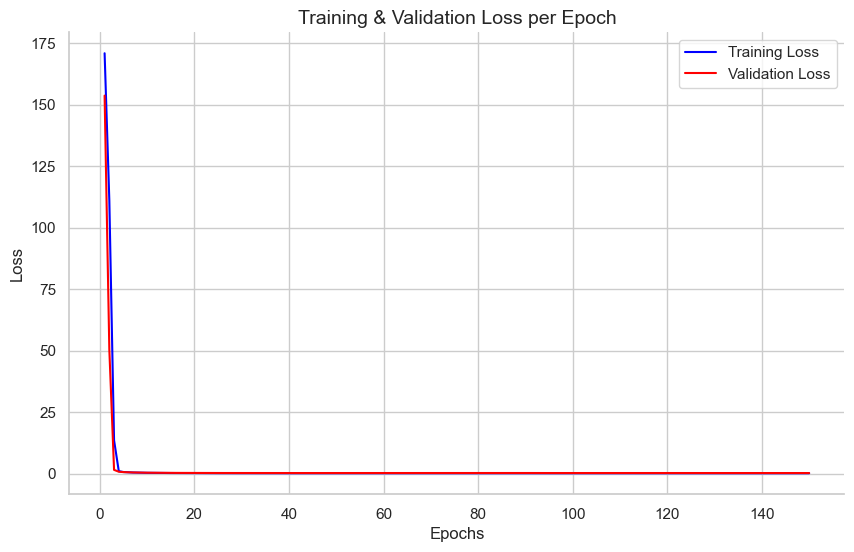

In [144]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Epochs', y='Train Loss', data=loss_df, label='Training Loss', color='blue')
sns.lineplot(x='Epochs', y='Validation Loss', data=loss_df, label='Validation Loss', color='red')

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training & Validation Loss per Epoch', fontsize=14)
plt.legend()
sns.despine()
plt.show()

In [145]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [146]:
predictions = model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('Variance Regression Score: ', explained_variance_score(y_test, predictions))

print(df_encoded['PRICE'].describe())

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE:  0.3284635296529623
MSE:  0.2192597365226287
RMSE:  0.4682517875274249
Variance Regression Score:  0.5457152400769782
count    3682.000000
mean       13.421410
std         0.709889
min         7.822044
25%        12.945629
50%        13.457407
75%        13.905122
max        14.912455
Name: PRICE, dtype: float64


**Plotting the graphs for errors and one for difference between models prediction and the targets hit**

C:\Users\Dwarkadhish Kamthane\AppData\Local\Temp\ipykernel_12876\919385730.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])
C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

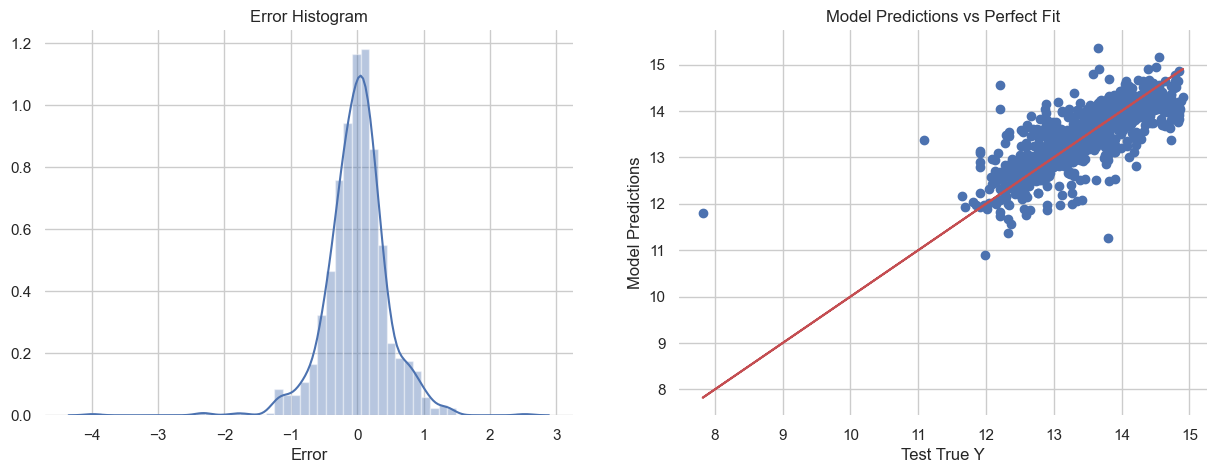

In [147]:
f, axes = plt.subplots(1, 2,figsize=(15,5))


plt.scatter(y_test,predictions)

plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(921, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [148]:
single_house = df_encoded.drop('PRICE', axis=1).iloc[2]
print(f'Features of new house:\n{single_house}')

single_house_scaled = scaler.transform(single_house.values.reshape(1, -1))

predicted_price = model.predict(single_house_scaled)[0, 0]
print('\nPrediction Price:', predicted_price)
original_price = df.iloc[2]['PRICE']
print('\nOriginal Price:', original_price)

mae = mean_absolute_error([original_price], [predicted_price])
print(f'\nMean Absolute Error (MAE): {mae:.2f}')

Features of new house:
BEDS                                   2.0
BATH                                   2.0
PROPERTYSQFT                   2184.207862
LATITUDE                         40.809448
LONGITUDE                       -73.946777
                                  ...     
STREET_NAME_Williamsburg             False
STREET_NAME_Windsor Terrace          False
STREET_NAME_Woodhaven                False
STREET_NAME_Woodside                 False
STREET_NAME_Woodstock                False
Name: 6, Length: 535, dtype: object
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Prediction Price: 13.99885

Original Price: 13.709595444100845

Mean Absolute Error (MAE): 0.29


C:\Users\Dwarkadhish Kamthane\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [149]:
df.head(1)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE
0,Condo for sale,12.660331,2.0,2.0,1400.0,"New York, NY 10022",New York County,New York,Manhattan,East 55th Street,40.761255,-73.974483


In [150]:
import pickle
with open('NY_house_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [151]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))